In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

# Market Share Analysis:
# Evaluate the market share of different manufacturers and models within the dataset.

# Price Analysis:
# Analyze pricing strategies and their impact on sales volumes.

# Correlation Analysis:
# Investigate relationships between variables, such as the correlation between car price and units sold.

# data clearance

df = pd.read_csv('/kaggle/input/car-sales-report/Car Sales.xlsx - car_data.csv')
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [34]:
# analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [35]:
# drop unnecessary ones
# Dealer_No has a space after it. Listing columns can be seen
# axis columns
df = df.drop(['Phone', 'Dealer_No '], axis=1)

In [36]:
# one style
df.columns = df.columns.str.lower().str.replace(" ", "_")
df = df.rename(columns={'price_($)':'price'})
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price', 'body_style', 'dealer_region'],
      dtype='object')

In [37]:
# datetime formate
df['date'] = pd.to_datetime(df['date'])

In [38]:
# analysis and statistics
# as values are too large min 10,080 max 11,200,000 this is steppe
df[['annual_income','price']].describe()

,annual_income,price
count,2.390600e+04,23906.000000
mean,8.308403e+05,28090.247846
std,7.200064e+05,14788.687608
min,1.008000e+04,1200.000000
25%,3.860000e+05,18001.000000
50%,7.350000e+05,23000.000000
75%,1.175750e+06,34000.000000
max,1.120000e+07,85800.000000


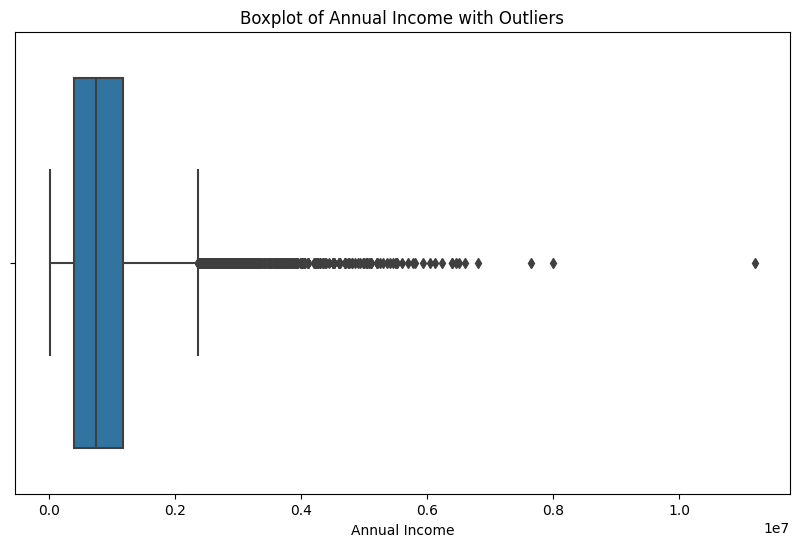

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='annual_income', data=df)
plt.title('Boxplot of Annual Income with Outliers')
plt.xlabel('Annual Income')
plt.show()

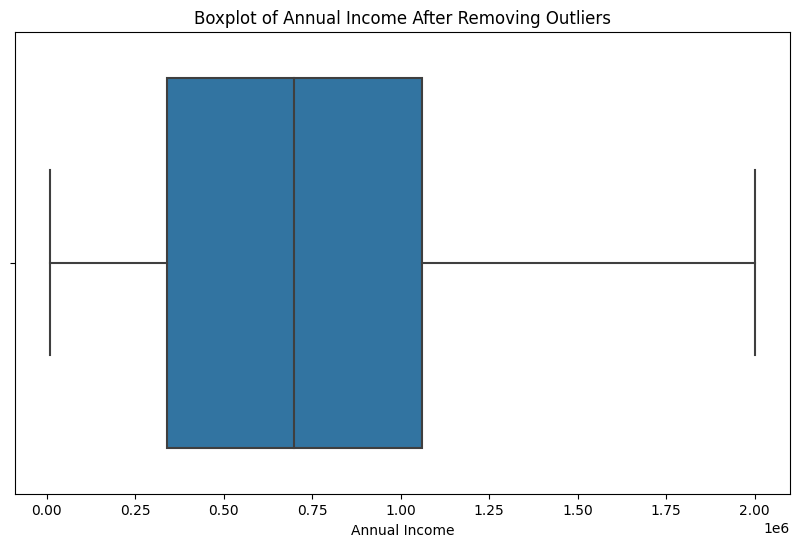

In [43]:
outlier = 2000000
df = df[df['annual_income'] <= outlier]

plt.figure(figsize=(10, 6))
sns.boxplot(x='annual_income', data=df)
plt.title('Boxplot of Annual Income After Removing Outliers')
plt.xlabel('Annual Income')
plt.show()

In [ ]:

# Sales Trends Over Time:
# Analyze monthly or yearly sales to identify growth patterns or seasonal fluctuations.
df['date'].head()
one = df[['date','model']].groupby('date').count().sort_values('date').reset_index()

plt.bar(one['date'], one['model'], color='skyblue')

plt.xlabel('Year-Month')
plt.ylabel('Number of Unique Models Sold')
plt.title('Number of Unique Car Models Sold Over Time')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

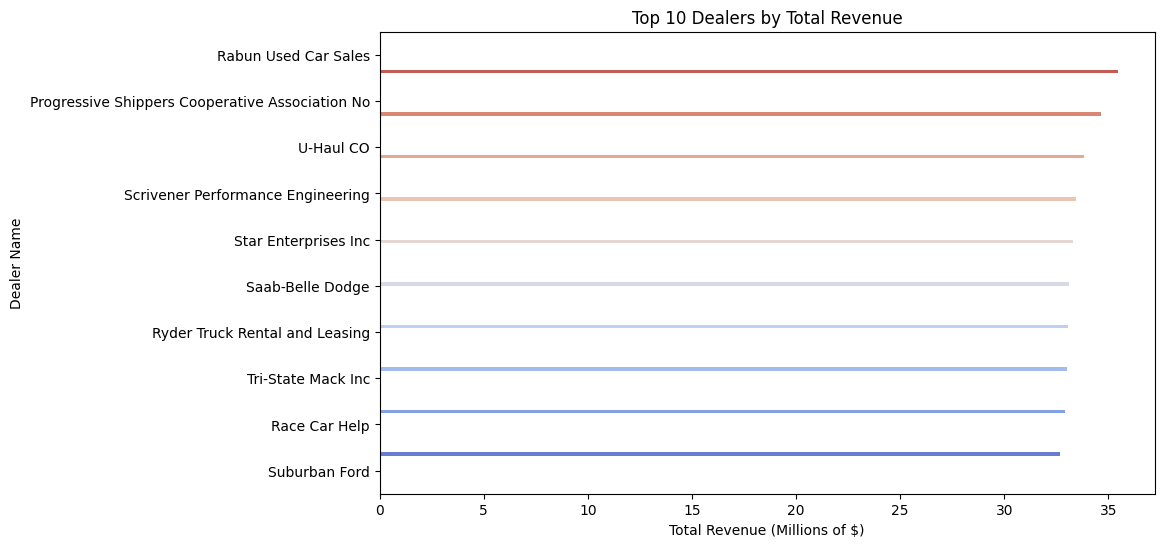

In [45]:
# Dealer Perfomance Analysis total revenue & average car prices
dealer_revenue = df.groupby('dealer_name')['price'].sum().reset_index()
dealer_revenue_sorted = dealer_revenue.sort_values(by='price', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='dealer_name', data=dealer_revenue_sorted.head(10), hue='price', palette='coolwarm')
plt.title('Top 10 Dealers by Total Revenue')
plt.xlabel('Total Revenue (Millions of $)')
plt.ylabel('Dealer Name')
plt.xticks(ticks=[0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000], 
           labels=[0, 5, 10, 15, 20, 25, 30, 35])
plt.legend([], [], frameon=False)
plt.show()

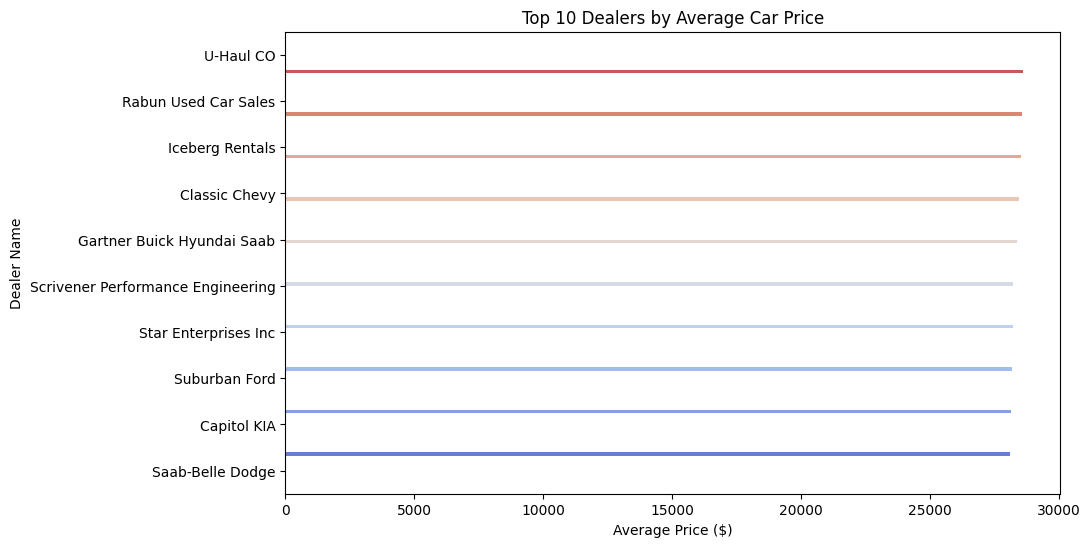

In [46]:
average_price_by_dealer = df.groupby('dealer_name')['price'].mean().reset_index()

average_price_by_dealer_sorted = average_price_by_dealer.sort_values(by='price', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='dealer_name', data=average_price_by_dealer_sorted.head(10), hue='price', palette='coolwarm')

plt.title('Top 10 Dealers by Average Car Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Dealer Name')
plt.legend([],[], frameon=False)
plt.show()

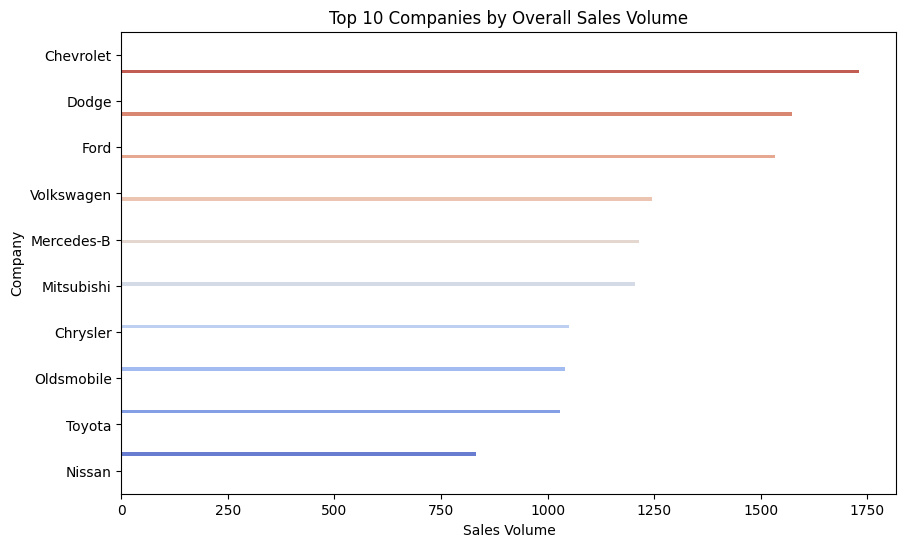

In [47]:
# Companies Analysis total sales, revenue, avg car prices
sales_volume = df['company'].value_counts().reset_index()
sales_volume.columns = ['company', 'total_sales_volume']
sales_volume_sorted = sales_volume.sort_values(by='total_sales_volume', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales_volume', y='company', data=sales_volume_sorted.head(10), hue='total_sales_volume', palette='coolwarm')
plt.title('Top 10 Companies by Overall Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Company')
plt.legend([],[], frameon=False)
plt.show()

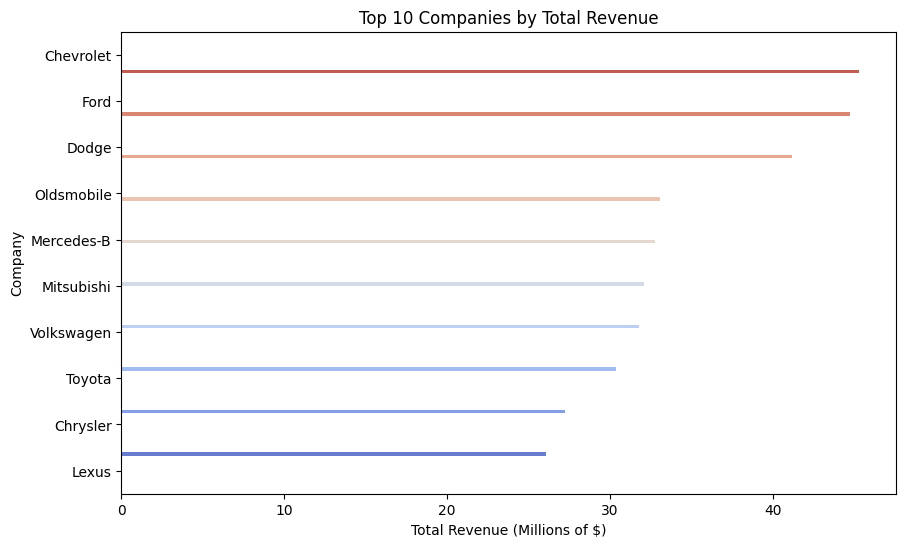

In [48]:
revenue = df.groupby('company')['price'].sum().reset_index()
revenue.columns = ['company', 'total_revenue']
revenue_sorted = revenue.sort_values(by='total_revenue', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='total_revenue', y='company', data=revenue_sorted.head(10), hue='total_revenue', palette='coolwarm')
plt.title('Top 10 Companies by Total Revenue')
plt.xlabel('Total Revenue (Millions of $)')
plt.ylabel('Company')
plt.xticks(ticks=[0, 10000000, 20000000, 30000000, 40000000], 
           labels=[0, 10, 20, 30, 40])
plt.legend([],[], frameon=False)

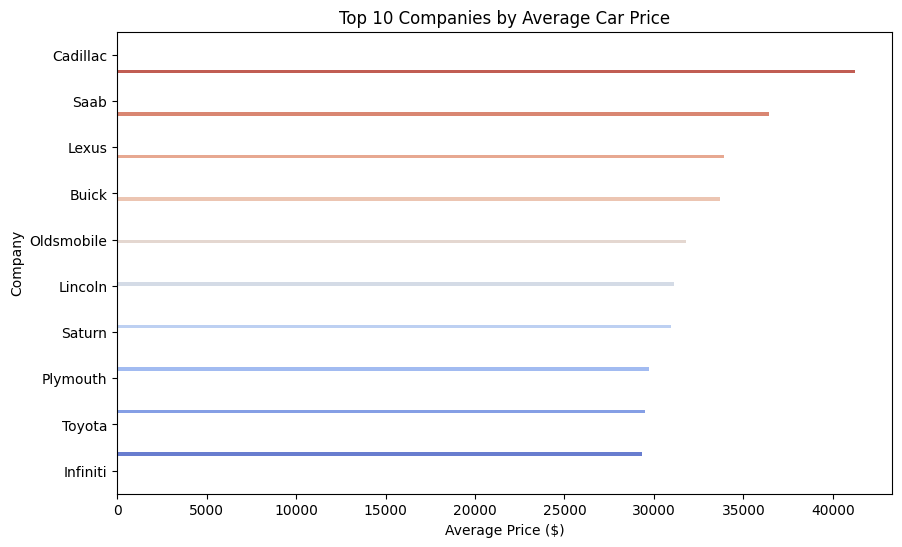

In [50]:
avg_price = df.groupby('company')['price'].mean().reset_index()
avg_price.columns = ['company', 'average_price']
avg_price_sorted = avg_price.sort_values(by='average_price', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='average_price', y='company', data=avg_price_sorted.head(10), hue='average_price',  palette='coolwarm')
plt.title('Top 10 Companies by Average Car Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Company')
plt.legend([],[], frameon=False)
plt.show()

In [ ]:
# Top-Selling Models and Manufacturers:
# Determine which car models and manufacturers have the highest sales volumes.
df['company_model'] = df['company'] + ' ' + df['model']
two = df.groupby('company_model').count().sort_values(by='customer_name', ascending=False).reset_index().head(10)

plt.bar(two['company_model'], two['customer_name'], color='red')

plt.xlabel('Car model')
plt.ylabel('Number of Unique Cars Sold')
plt.title('Top-Selling Car Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Regional Sales Analysis:
# Compare sales performance across different regions to identify high-performing markets.
three = df.groupby('dealer_region').count().reset_index().sort_values(by='Car_id', ascending=False)

plt.bar(three['dealer_region'], three['customer_name'], color='red')

plt.xlabel('Car model')
plt.ylabel('Number of Unique Cars Sold')
plt.title('Top-Selling Car Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

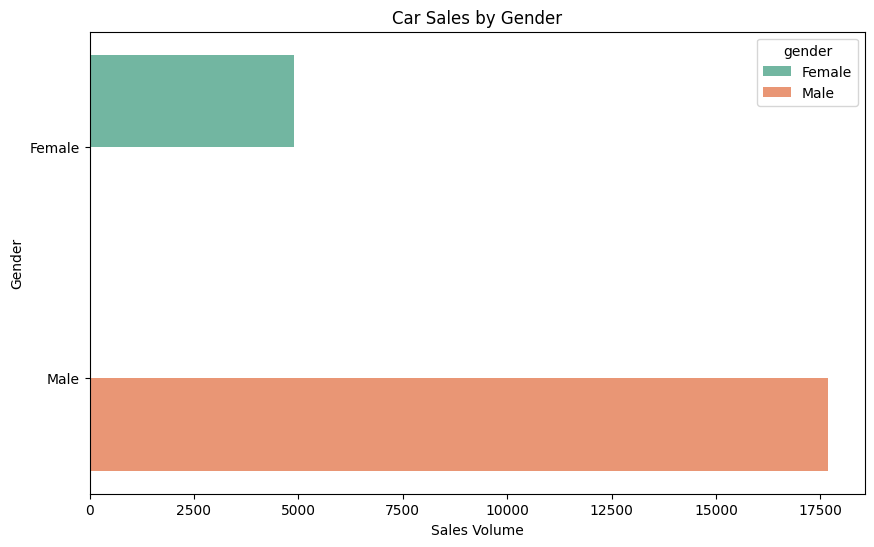

In [51]:
gender_sales = df.groupby('gender').size().reset_index(name='sales_volume')
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_volume', y='gender', data=gender_sales, hue='gender', palette='Set2', orient='h')
plt.title('Car Sales by Gender')
plt.xlabel('Sales Volume')
plt.ylabel('Gender')
plt.show()


<Figure size 1000x600 with 0 Axes>

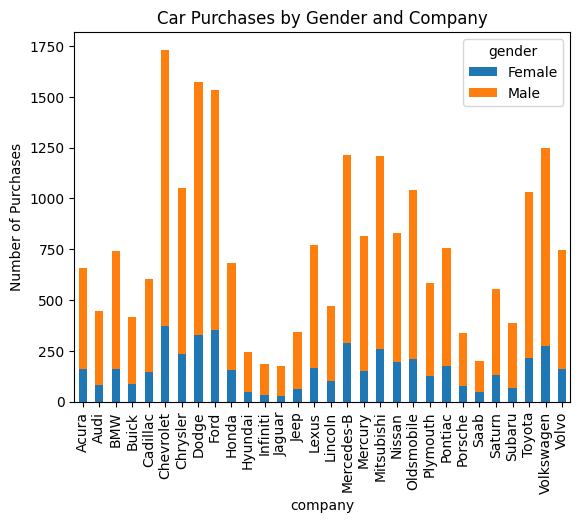

In [52]:
gender_company = df.groupby(['gender', 'company']).size().reset_index(name='count')
gender_company_pivot = gender_company.pivot(index='company', columns='gender', values='count').fillna(0)
plt.figure(figsize=(10, 6))
gender_company_pivot.plot(kind='bar', stacked=True)
plt.title('Car Purchases by Gender and Company')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=90)
plt.show()

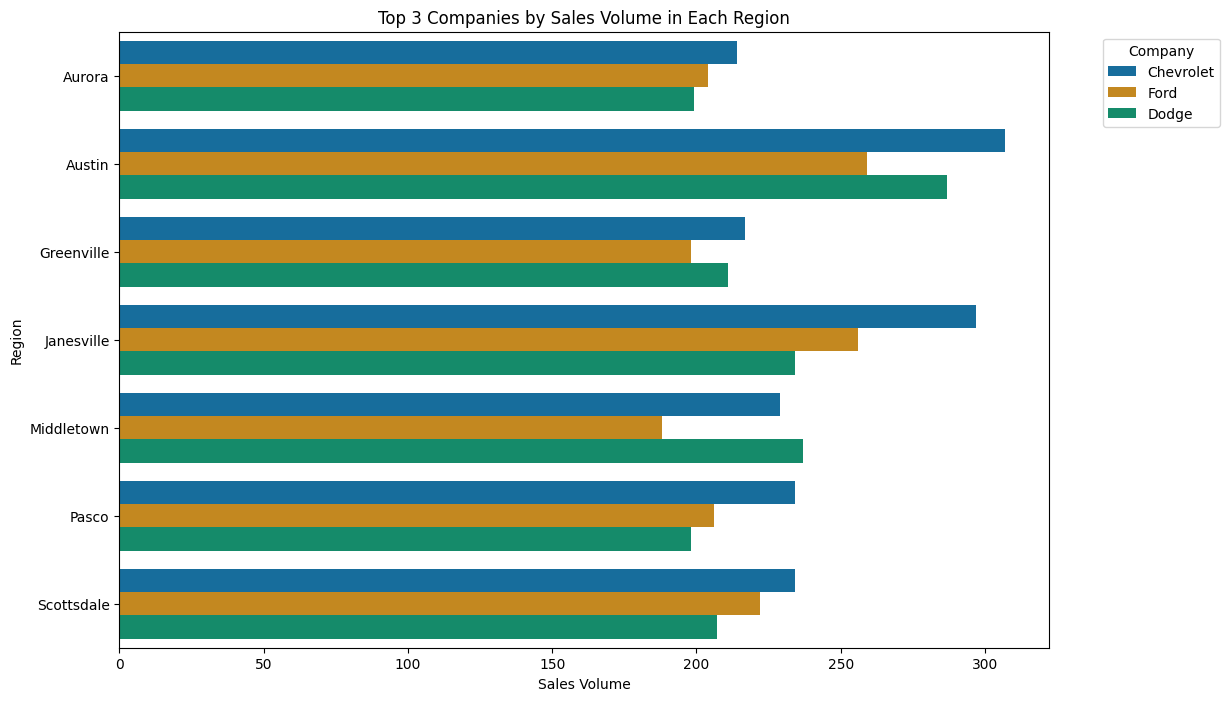

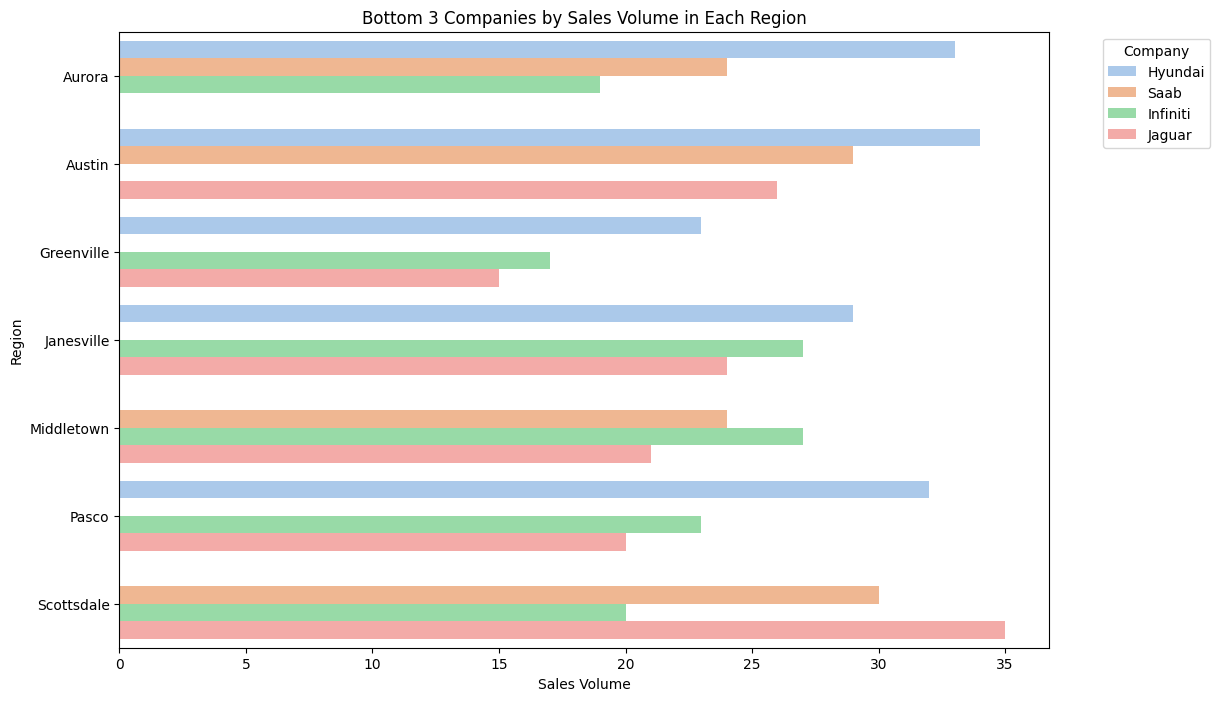

In [53]:
region_sales = df.groupby(['dealer_region', 'company']).size().reset_index(name='sales_volume')

region_sales_sorted = region_sales.sort_values(['dealer_region', 'sales_volume'], ascending=[True, False])

# Select top 3 and least 3 companies per region
top_3_per_region = region_sales_sorted.groupby('dealer_region').head(3)
bottom_3_per_region = region_sales_sorted.groupby('dealer_region').tail(3)
# Plot for top 3 companies per region
plt.figure(figsize=(12, 8))
sns.barplot(x='sales_volume', y='dealer_region', hue='company', data=top_3_per_region, dodge=True, palette='colorblind')
plt.title('Top 3 Companies by Sales Volume in Each Region')
plt.xlabel('Sales Volume')
plt.ylabel('Region')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot for bottom 3 companies per region
plt.figure(figsize=(12, 8))
sns.barplot(x='sales_volume', y='dealer_region', hue='company', data=bottom_3_per_region, dodge=True, palette='pastel')
plt.title('Bottom 3 Companies by Sales Volume in Each Region')
plt.xlabel('Sales Volume')
plt.ylabel('Region')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()